In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,make_scorer
from sklearn.feature_selection  import SelectFromModel
from sklearn.model_selection import cross_val_score,KFold
from sklearn.base import clone
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import skew,norm

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier



In [2]:
train=pd.read_csv('/content/Loan.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
train,test=train_test_split(train,test_size=0.2,random_state=42)

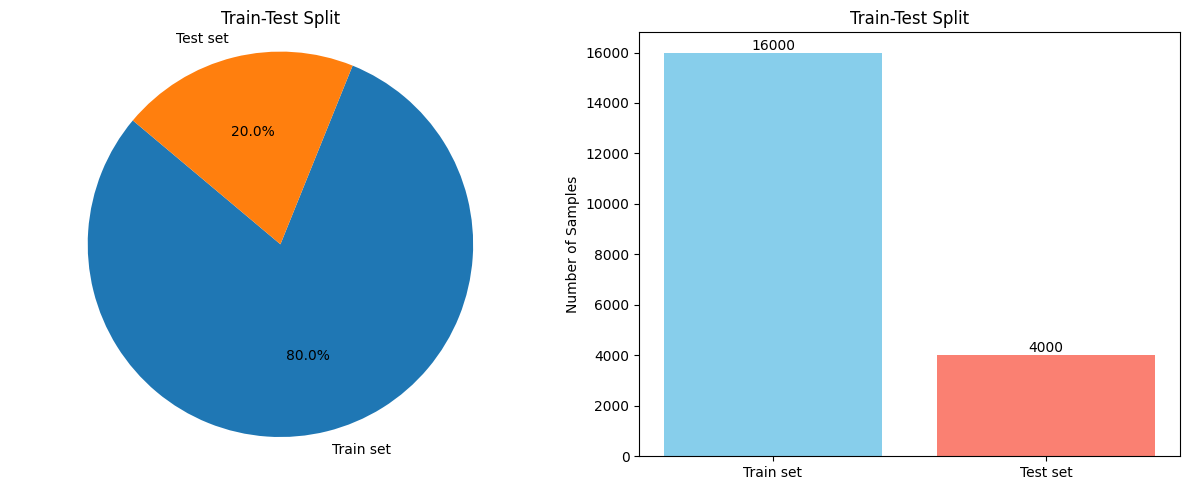

In [5]:
sizes=[len(train),len(test)]
labels=['Train set','Test set']
colors=['skyblue','salmon']
fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
ax[0].axis('equal')
ax[0].set_title('Train-Test Split')

bars=ax[1].bar(labels,sizes,color=colors)
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval),  ha='center', va='bottom')

ax[1].set_title('Train-Test Split')
ax[1].set_ylabel("Number of Samples")
plt.tight_layout()
plt.show()

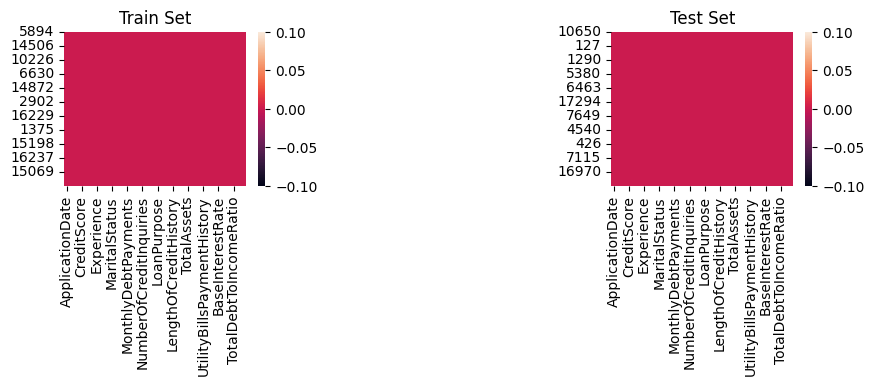

In [6]:
plt.figure(figsize=(10,2))

plt.subplot(1,3,1)
sns.heatmap(train.isnull())
plt.title('Train Set')


plt.subplot(1,3,3)
sns.heatmap(test.isnull())
plt.title("Test Set")
plt.show()

In [7]:
print("Train")
display(train.info())
print("Test")
display(test.info())

Train
<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 5894 to 15795
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             16000 non-null  object 
 1   Age                         16000 non-null  int64  
 2   AnnualIncome                16000 non-null  int64  
 3   CreditScore                 16000 non-null  int64  
 4   EmploymentStatus            16000 non-null  object 
 5   EducationLevel              16000 non-null  object 
 6   Experience                  16000 non-null  int64  
 7   LoanAmount                  16000 non-null  int64  
 8   LoanDuration                16000 non-null  int64  
 9   MaritalStatus               16000 non-null  object 
 10  NumberOfDependents          16000 non-null  int64  
 11  HomeOwnershipStatus         16000 non-null  object 
 12  MonthlyDebtPayments         16000 non-null  int64  
 13  CreditCardUtilizationRate  

None

Test
<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 10650 to 15196
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             4000 non-null   object 
 1   Age                         4000 non-null   int64  
 2   AnnualIncome                4000 non-null   int64  
 3   CreditScore                 4000 non-null   int64  
 4   EmploymentStatus            4000 non-null   object 
 5   EducationLevel              4000 non-null   object 
 6   Experience                  4000 non-null   int64  
 7   LoanAmount                  4000 non-null   int64  
 8   LoanDuration                4000 non-null   int64  
 9   MaritalStatus               4000 non-null   object 
 10  NumberOfDependents          4000 non-null   int64  
 11  HomeOwnershipStatus         4000 non-null   object 
 12  MonthlyDebtPayments         4000 non-null   int64  
 13  CreditCardUtilizationRate   

None

<ipython-input-8-c63a1d55a098>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')


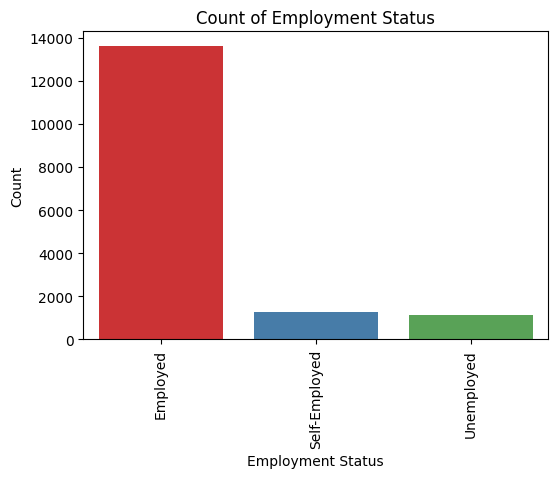

In [8]:
area_counts=train['EmploymentStatus'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')
plt.title("Count of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-9-b5c080adf734>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set2')


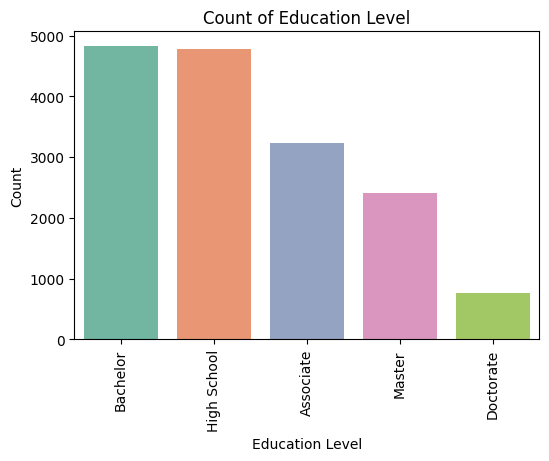

In [9]:
area_counts=train['EducationLevel'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set2')
plt.title("Count of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-10-d9f698feef7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')


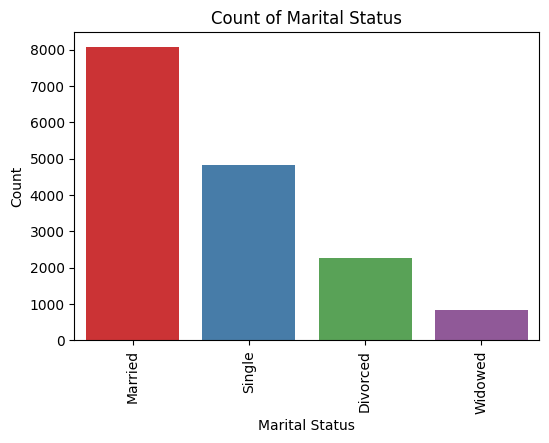

In [10]:
area_counts=train['MaritalStatus'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')
plt.title("Count of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-11-39958a753d1c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set2')


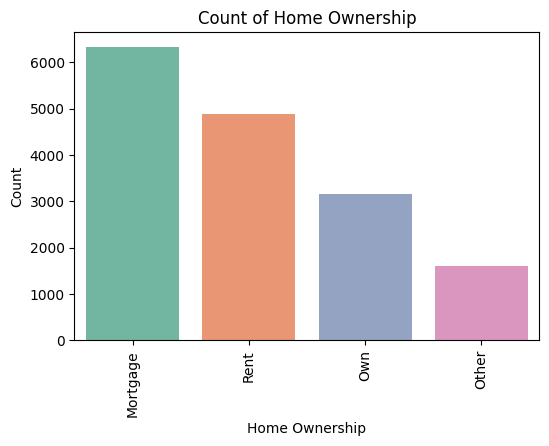

In [11]:
area_counts=train['HomeOwnershipStatus'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set2')
plt.title("Count of Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-0dfa6310b126>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')


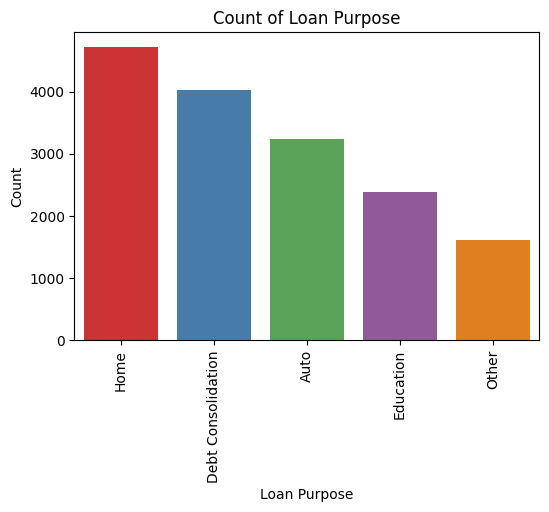

In [12]:
area_counts=train['LoanPurpose'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=area_counts.index,y=area_counts.values,palette='Set1')
plt.title("Count of Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [13]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [14]:
train

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0          2034-02-20   45         15000          620         Employed   
1          2028-03-17   25         49855          486         Employed   
2          2042-07-12   51         38932          576         Employed   
3          2039-01-02   18         58116          516       Unemployed   
4          2034-06-05   25         62939          562         Employed   
...               ...  ...           ...          ...              ...   
15995      2048-11-23   32         37134          569         Employed   
15996      2050-10-04   30         15000          618         Employed   
15997      2032-10-04   31         48088          517         Employed   
15998      2020-05-10   42         15265          606         Employed   
15999      2061-03-31   37         45197          631         Employed   

      EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0          Associate          21       17419            36       Married  ...   
1             Master           3       18998            48       Married  ...   
2             Master          30       17844            72       Married  ...   
3        High School           0       24050            60       Married  ...   
4           Bachelor           3       27263            36       Married  ...   
...              ...         ...         ...           ...           ...  ...   
15995    High School          10       31048            48       Married  ...   
15996       Bachelor           6       17491            48       Widowed  ...   
15997         Master           4       11381           120       Married  ...   
15998       Bachelor          20       10643            60       Married  ...   
15999       Bachelor          15       52646            36      Divorced  ...   

       MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0        1250.000000                   0.832612          7     59717   
1        4154.583333                   0.510667          4      4711   
2        3244.333333                   0.835804          4      2228   
3        4843.000000                   0.851177          4     52964   
4        5244.916667                   0.587644          3    189178   
...              ...                        ...        ...       ...   
15995    3094.500000                   0.715250          6    525387   
15996    1250.000000                   0.590477          3      7558   
15997    4007.333333                   0.696813          5    654095   
15998    1272.083333                   0.882421          1     35612   
15999    3766.416667                   0.883861          5     26458   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0              0.192419      0.199351          646.777017   
1              0.270998      0.277787          659.717604   
2              0.244844      0.250450          481.159537   
3              0.271050      0.254826          712.720107   
4              0.231263      0.185010          992.488743   
...                 ...           ...                 ...   
15995          0.241548      0.217129          973.367177   
15996          0.203491      0.233639          564.104989   
15997          0.307881      0.320535          317.423040   
15998          0.212643      0.205157          285.037128   
15999          0.222146      0.257427         2113.932155   

       TotalDebtToIncomeRatio LoanApproved  RiskScore  
0                    0.932622            0       49.0  
1                    0.256035            0       61.0  
2                    0.299648            0       52.0  
3                    0.318753            0       54.0  
4                    0.335275            0       58.0  
...                       ...          ...        ...  
15995                0.496160            0       43.0  
15996                0.927284            0       62.0  
15997                0.194998            1

In [15]:
test

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0         2047-02-28   37        100761          604         Employed   
1         2023-08-04   35        189154          509         Employed   
2         2041-09-25   44         73272          483         Employed   
3         2021-01-19   41         57115          412         Employed   
4         2056-01-24   39         61155          551         Employed   
...              ...  ...           ...          ...              ...   
3995      2029-02-25   38         62891          538    Self-Employed   
3996      2038-05-18   41         37946          615         Employed   
3997      2045-05-18   47         15000          537         Employed   
3998      2023-02-14   26         38443          600    Self-Employed   
3999      2059-08-10   45         59283          481         Employed   

     EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0       High School          16       28479            84        Single  ...   
1       High School          11       11222            60       Married  ...   
2       High School          20       31573            48       Widowed  ...   
3            Master          20       21937            12       Married  ...   
4            Master          19       31510            48      Divorced  ...   
...             ...         ...         ...           ...           ...  ...   
3995    High School          18       15867            60       Married  ...   
3996      Associate          17       17570            48       Married  ...   
3997      Associate          25       34370            24        Single  ...   
3998    High School           3       27070            48       Married  ...   
3999       Bachelor          27       37211            60      Divorced  ...   

      MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0       8396.750000                   0.809983          7      7304   
1      15762.833333                   0.831507          7     22443   
2       6106.000000                   0.800830          1     20044   
3       4759.583333                   0.954407          5      1714   
4       5096.250000                   0.840267          3     55941   
...             ...                        ...        ...       ...   
3995    5240.916667                   0.839494          1    273416   
3996    3162.166667                   0.939972          4     90558   
3997    1250.000000                   0.870703          5     23169   
3998    3203.583333                   0.950359         10     18567   
3999    4940.250000                   0.681281          5      2437   

      BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0             0.251479      0.222397          671.369324   
1             0.261722      0.270451          342.970300   
2             0.285073      0.342088         1215.387601   
3             0.280937      0.280613         2117.710361   
4             0.251010      0.250815         1046.213156   
...                ...           ...                 ...   
3995          0.251867      0.224049          441.889887   
3996          0.205070      0.199855          534.526117   
3997          0.240870      0.261736         1854.679311   
3998          0.222070      0.261538          915.071479   
3999          0.301711      0.307611         1221.355467   

      TotalDebtToIncomeRatio LoanApproved  RiskScore  
0                   0.090436            1       41.6  
1                   0.047832            1       38.4  
2                   0.271436            0       53.0  
3                   0.530868            0       50.0  
4                   0.309877            0       51.0  
...                      ...          ...        ...  
3995                0.334081            1       41.6  
3996                0.331585            0       45.0  
3997                1.846943            0       51.0  
3998                0.576564            0  

In [16]:
train_target=train['RiskScore']
test_target=test['RiskScore']

train_data=train.drop('RiskScore',axis=1)
test_data=test.drop('RiskScore',axis=1)

combined=pd.concat([train_data,test_data],axis=0)

le=LabelEncoder()

for i in combined.columns:
  if combined[i].dtypes =='object':
    combined[i]=le.fit_transform(combined[i])


train_data_trasnformed=combined.iloc[:len(train_data),:]
test_data__transformed=combined.iloc[len(train_data):,:]


train_transform=pd.concat([train_data_trasnformed,train_target.reset_index(drop=True)],axis=1)
test_transform=pd.concat([test_data__transformed,test_target.reset_index(drop=True)],axis=1)

train_data=train_transform.copy()
test_data=test_transform.copy()

display(train_data)
display(test_data)

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0                 5894   45         15000          620                 0   
1                 3728   25         49855          486                 0   
2                 8958   51         38932          576                 0   
3                 7671   18         58116          516                 2   
4                 5999   25         62939          562                 0   
...                ...  ...           ...          ...               ...   
15995            11284   32         37134          569                 0   
15996            11964   30         15000          618                 0   
15997             5390   31         48088          517                 0   
15998              860   42         15265          606                 0   
15999            15795   37         45197          631                 0   

       EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0                   0          21       17419            36              1   
1                   4           3       18998            48              1   
2                   4          30       17844            72              1   
3                   3           0       24050            60              1   
4                   1           3       27263            36              1   
...               ...         ...         ...           ...            ...   
15995               3          10       31048            48              1   
15996               1           6       17491            48              3   
15997               4           4       11381           120              1   
15998               1          20       10643            60              1   
15999               1          15       52646            36              0   

       ...  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0      ...    1250.000000                    0.832612          7     59717   
1      ...    4154.583333                    0.510667          4      4711   
2      ...    3244.333333                    0.835804          4      2228   
3      ...    4843.000000                    0.851177          4     52964   
4      ...    5244.916667                    0.587644          3    189178   
...    ...            ...                         ...        ...       ...   
15995  ...    3094.500000                    0.715250          6    525387   
15996  ...    1250.000000                    0.590477          3      7558   
15997  ...    4007.333333                    0.696813          5    654095   
15998  ...    1272.083333                    0.882421          1     35612   
15999  ...    3766.416667                    0.883861          5     26458   

       BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0              0.192419      0.199351          646.777017   
1              0.270998      0.277787          659.717604   
2              0.244844      0.250450          481.159537   
3              0.271050      0.254826          712.720107   
4              0.231263      0.185010          992.488743   
...                 ...           ...                 ...   
15995          0.241548      0.217129          973.367177   
15996          0.203491      0.233639          564.104989   
15997          0.307881      0.320535          317.423040   
15998          0.212643      0.205157          285.037128   
15999          0.222146      0.257427         2113.932155   

       TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0                    0.932622             0       49.0  
1                    0.256035             0       61.0  
2                    0.299648             0       52.0  
3                    0.318753             0       54.0  
4                    0.335275             0       58.0  
...                       ...           ...        ...  
15995                0.496160             0       43.0  
15996                0.927284  

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0               10650   37        100761          604                 0   
1                2041   35        189154          509                 0   
2                8668   44         73272          483                 0   
3                1114   41         57115          412                 0   
4               13902   39         61155          551                 0   
...               ...  ...           ...          ...               ...   
3995             4073   38         62891          538                 1   
3996             7442   41         37946          615                 0   
3997             9999   47         15000          537                 0   
3998             1870   26         38443          600                 1   
3999            15196   45         59283          481                 0   

      EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0                  3          16       28479            84              2   
1                  3          11       11222            60              1   
2                  3          20       31573            48              3   
3                  4          20       21937            12              1   
4                  4          19       31510            48              0   
...              ...         ...         ...           ...            ...   
3995               3          18       15867            60              1   
3996               0          17       17570            48              1   
3997               0          25       34370            24              2   
3998               3           3       27070            48              1   
3999               1          27       37211            60              0   

      ...  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0     ...    8396.750000                    0.809983          7      7304   
1     ...   15762.833333                    0.831507          7     22443   
2     ...    6106.000000                    0.800830          1     20044   
3     ...    4759.583333                    0.954407          5      1714   
4     ...    5096.250000                    0.840267          3     55941   
...   ...            ...                         ...        ...       ...   
3995  ...    5240.916667                    0.839494          1    273416   
3996  ...    3162.166667                    0.939972          4     90558   
3997  ...    1250.000000                    0.870703          5     23169   
3998  ...    3203.583333                    0.950359         10     18567   
3999  ...    4940.250000                    0.681281          5      2437   

      BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0             0.251479      0.222397          671.369324   
1             0.261722      0.270451          342.970300   
2             0.285073      0.342088         1215.387601   
3             0.280937      0.280613         2117.710361   
4             0.251010      0.250815         1046.213156   
...                ...           ...                 ...   
3995          0.251867      0.224049          441.889887   
3996          0.205070      0.199855          534.526117   
3997          0.240870      0.261736         1854.679311   
3998          0.222070      0.261538          915.071479   
3999          0.301711      0.307611         1221.355467   

      TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0                   0.090436             1       41.6  
1                   0.047832             1       38.4  
2                   0.271436             0       53.0  
3                   0.530868             0       50.0  
4                   0.309877             0       51.0  
...                      ...           ...        ...  
3995                0.334081             1       41.6  
3996                0.331585             0       45.0  
3997                1.846943  

In [17]:
combined

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0                5894   45         15000          620                 0   
1                3728   25         49855          486                 0   
2                8958   51         38932          576                 0   
3                7671   18         58116          516                 2   
4                5999   25         62939          562                 0   
...               ...  ...           ...          ...               ...   
3995             4073   38         62891          538                 1   
3996             7442   41         37946          615                 0   
3997             9999   47         15000          537                 0   
3998             1870   26         38443          600                 1   
3999            15196   45         59283          481                 0   

      EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0                  0          21       17419            36              1   
1                  4           3       18998            48              1   
2                  4          30       17844            72              1   
3                  3           0       24050            60              1   
4                  1           3       27263            36              1   
...              ...         ...         ...           ...            ...   
3995               3          18       15867            60              1   
3996               0          17       17570            48              1   
3997               0          25       34370            24              2   
3998               3           3       27070            48              1   
3999               1          27       37211            60              0   

      ...  TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  \
0     ...             12405    1250.000000                    0.832612   
1     ...             68894    4154.583333                    0.510667   
2     ...             65273    3244.333333                    0.835804   
3     ...             59908    4843.000000                    0.851177   
4     ...              1509    5244.916667                    0.587644   
...   ...               ...            ...                         ...   
3995  ...              9470    5240.916667                    0.839494   
3996  ...              3568    3162.166667                    0.939972   
3997  ...             14706    1250.000000                    0.870703   
3998  ...             21847    3203.583333                    0.950359   
3999  ...             44152    4940.250000                    0.681281   

      JobTenure  NetWorth  BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0             7     59717          0.192419      0.199351          646.777017   
1             4      4711          0.270998      0.277787          659.717604   
2             4      2228          0.244844      0.250450          481.159537   
3             4     52964          0.271050      0.254826          712.720107   
4             3    189178          0.231263      0.185010          992.488743   
...         ...       ...               ...           ...                 ...   
3995          1    273416          0.251867      0.224049          441.889887   
3996          4     90558          0.205070      0.199855          534.526117   
3997          5     23169          0.240870      0.261736         1854.679311   
3998         10     18567          0.222070      0.261538          915.071479   
3999          5      2437          0.301711      0.307611         1221.355467   

      TotalDebtToIncomeRatio  LoanApproved  
0                   0.932622             0  
1                   0.256035             0  
2                   0.299648             0  
3                   0.318753             0  
4                   0.335275             0  
...                      ...           ...  
399

In [18]:
combined.iloc[len(train_data):]

ApplicationDate  Age  AnnualIncome  CreditScore  EmploymentStatus  \
0               10650   37        100761          604                 0   
1                2041   35        189154          509                 0   
2                8668   44         73272          483                 0   
3                1114   41         57115          412                 0   
4               13902   39         61155          551                 0   
...               ...  ...           ...          ...               ...   
3995             4073   38         62891          538                 1   
3996             7442   41         37946          615                 0   
3997             9999   47         15000          537                 0   
3998             1870   26         38443          600                 1   
3999            15196   45         59283          481                 0   

      EducationLevel  Experience  LoanAmount  LoanDuration  MaritalStatus  \
0                  3          16       28479            84              2   
1                  3          11       11222            60              1   
2                  3          20       31573            48              3   
3                  4          20       21937            12              1   
4                  4          19       31510            48              0   
...              ...         ...         ...           ...            ...   
3995               3          18       15867            60              1   
3996               0          17       17570            48              1   
3997               0          25       34370            24              2   
3998               3           3       27070            48              1   
3999               1          27       37211            60              0   

      ...  TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  \
0     ...              2909    8396.750000                    0.809983   
1     ...             20156   15762.833333                    0.831507   
2     ...             55131    6106.000000                    0.800830   
3     ...             40497    4759.583333                    0.954407   
4     ...             16756    5096.250000                    0.840267   
...   ...               ...            ...                         ...   
3995  ...              9470    5240.916667                    0.839494   
3996  ...              3568    3162.166667                    0.939972   
3997  ...             14706    1250.000000                    0.870703   
3998  ...             21847    3203.583333                    0.950359   
3999  ...             44152    4940.250000                    0.681281   

      JobTenure  NetWorth  BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0             7      7304          0.251479      0.222397          671.369324   
1             7     22443          0.261722      0.270451          342.970300   
2             1     20044          0.285073      0.342088         1215.387601   
3             5      1714          0.280937      0.280613         2117.710361   
4             3     55941          0.251010      0.250815         1046.213156   
...         ...       ...               ...           ...                 ...   
3995          1    273416          0.251867      0.224049          441.889887   
3996          4     90558          0.205070      0.199855          534.526117   
3997          5     23169          0.240870      0.261736         1854.679311   
3998         10     18567          0.222070      0.261538          915.071479   
3999          5      2437          0.301711      0.307611         1221.355467   

      TotalDebtToIncomeRatio  LoanApproved  
0                   0.090436             1  
1                   0.047832             1  
2                   0.271436             0  
3                   0.530868             0  
4                   0.309877             0  
...                      ...           ...  
399

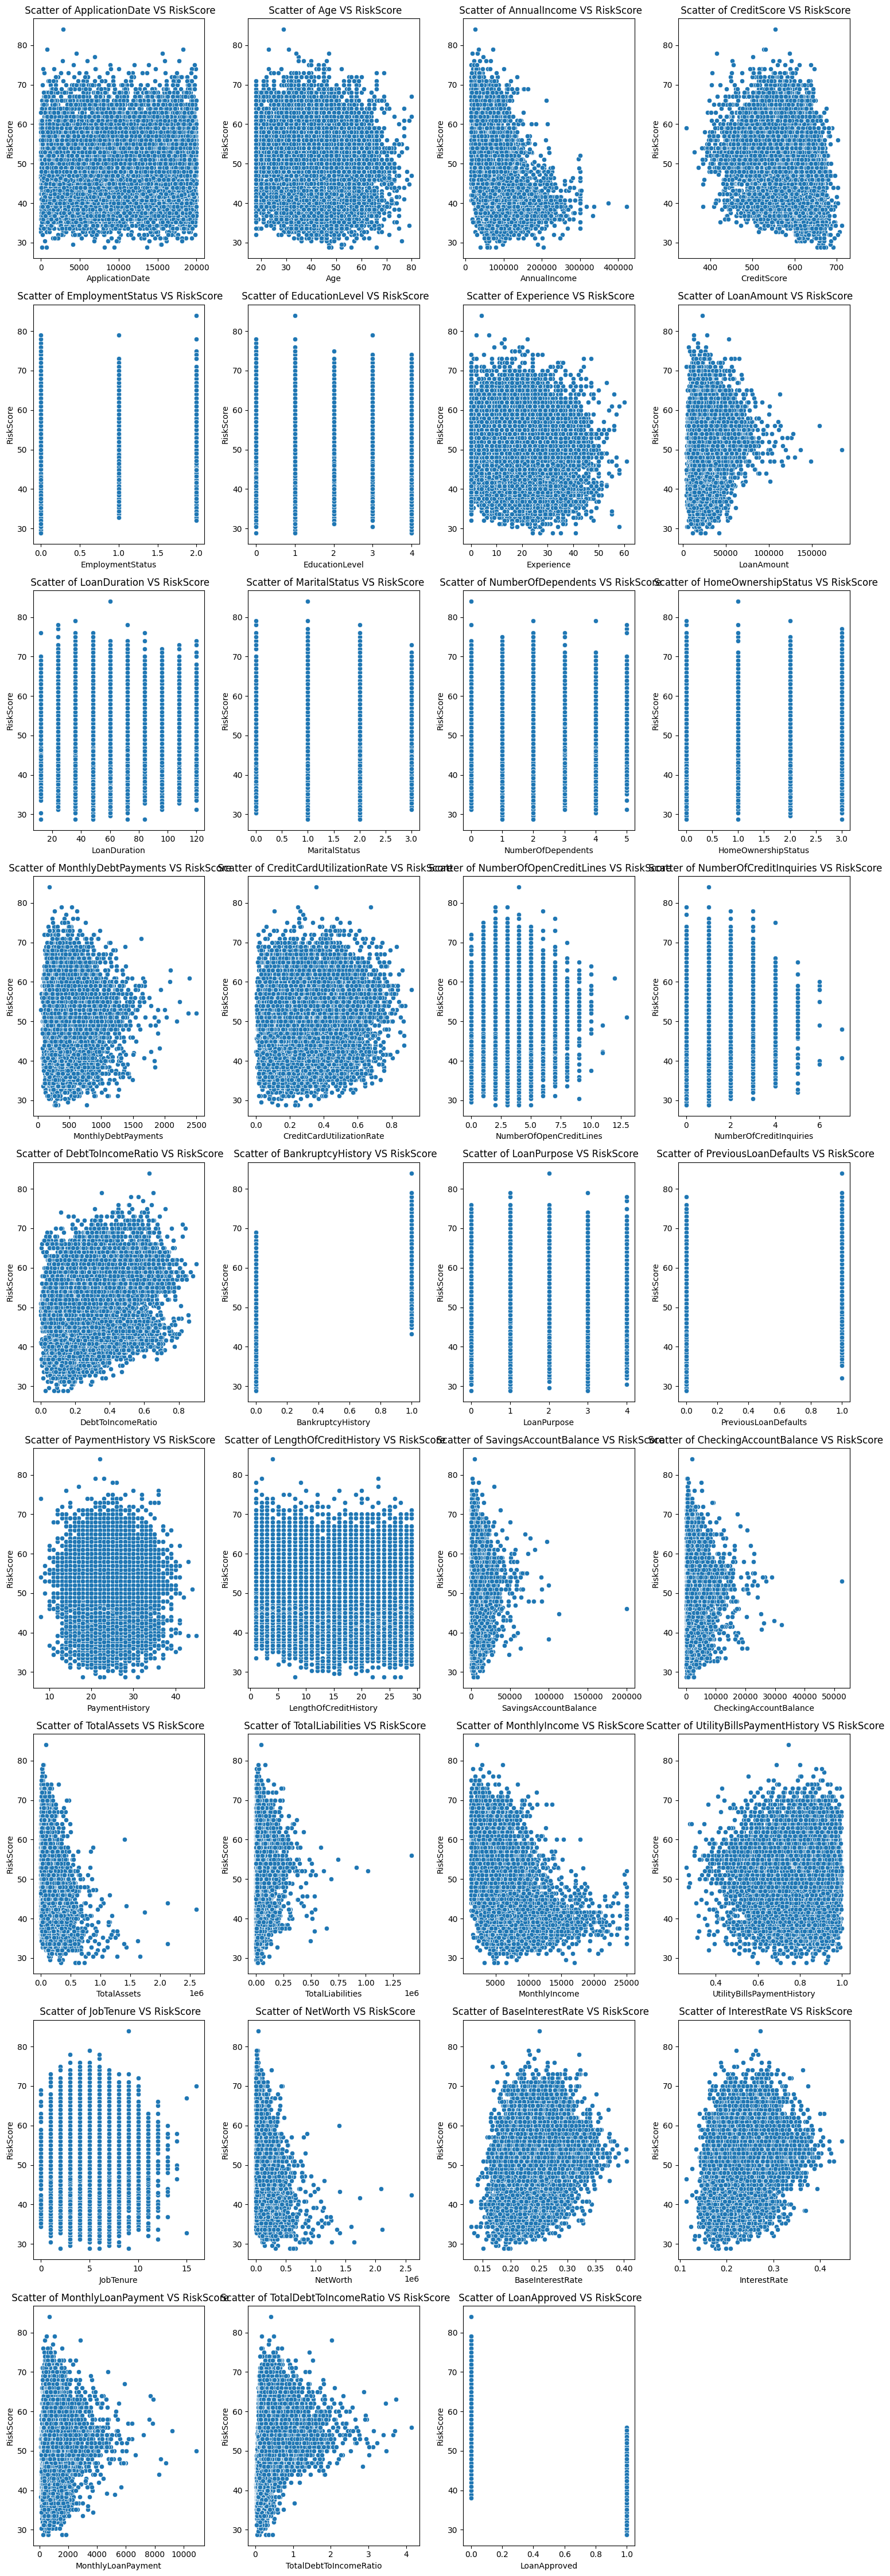

In [19]:
target_columns = 'RiskScore'
features=train_data.columns.drop(target_columns)

n_feature = len(features)
n_cols= 4
n_rows=(n_feature + n_cols - 1) // n_cols

plt.figure(figsize=(15,n_rows * 5))

for i,feature in enumerate(features):
  plt.subplot(n_rows,n_cols,i+1)
  sns.scatterplot(x=train_data[feature],y=train_data[target_columns])
  plt.title(f" Scatter of {feature} VS {target_columns}")
  plt.xlabel(feature)
  plt.ylabel(target_columns)

plt.tight_layout()
plt.show()


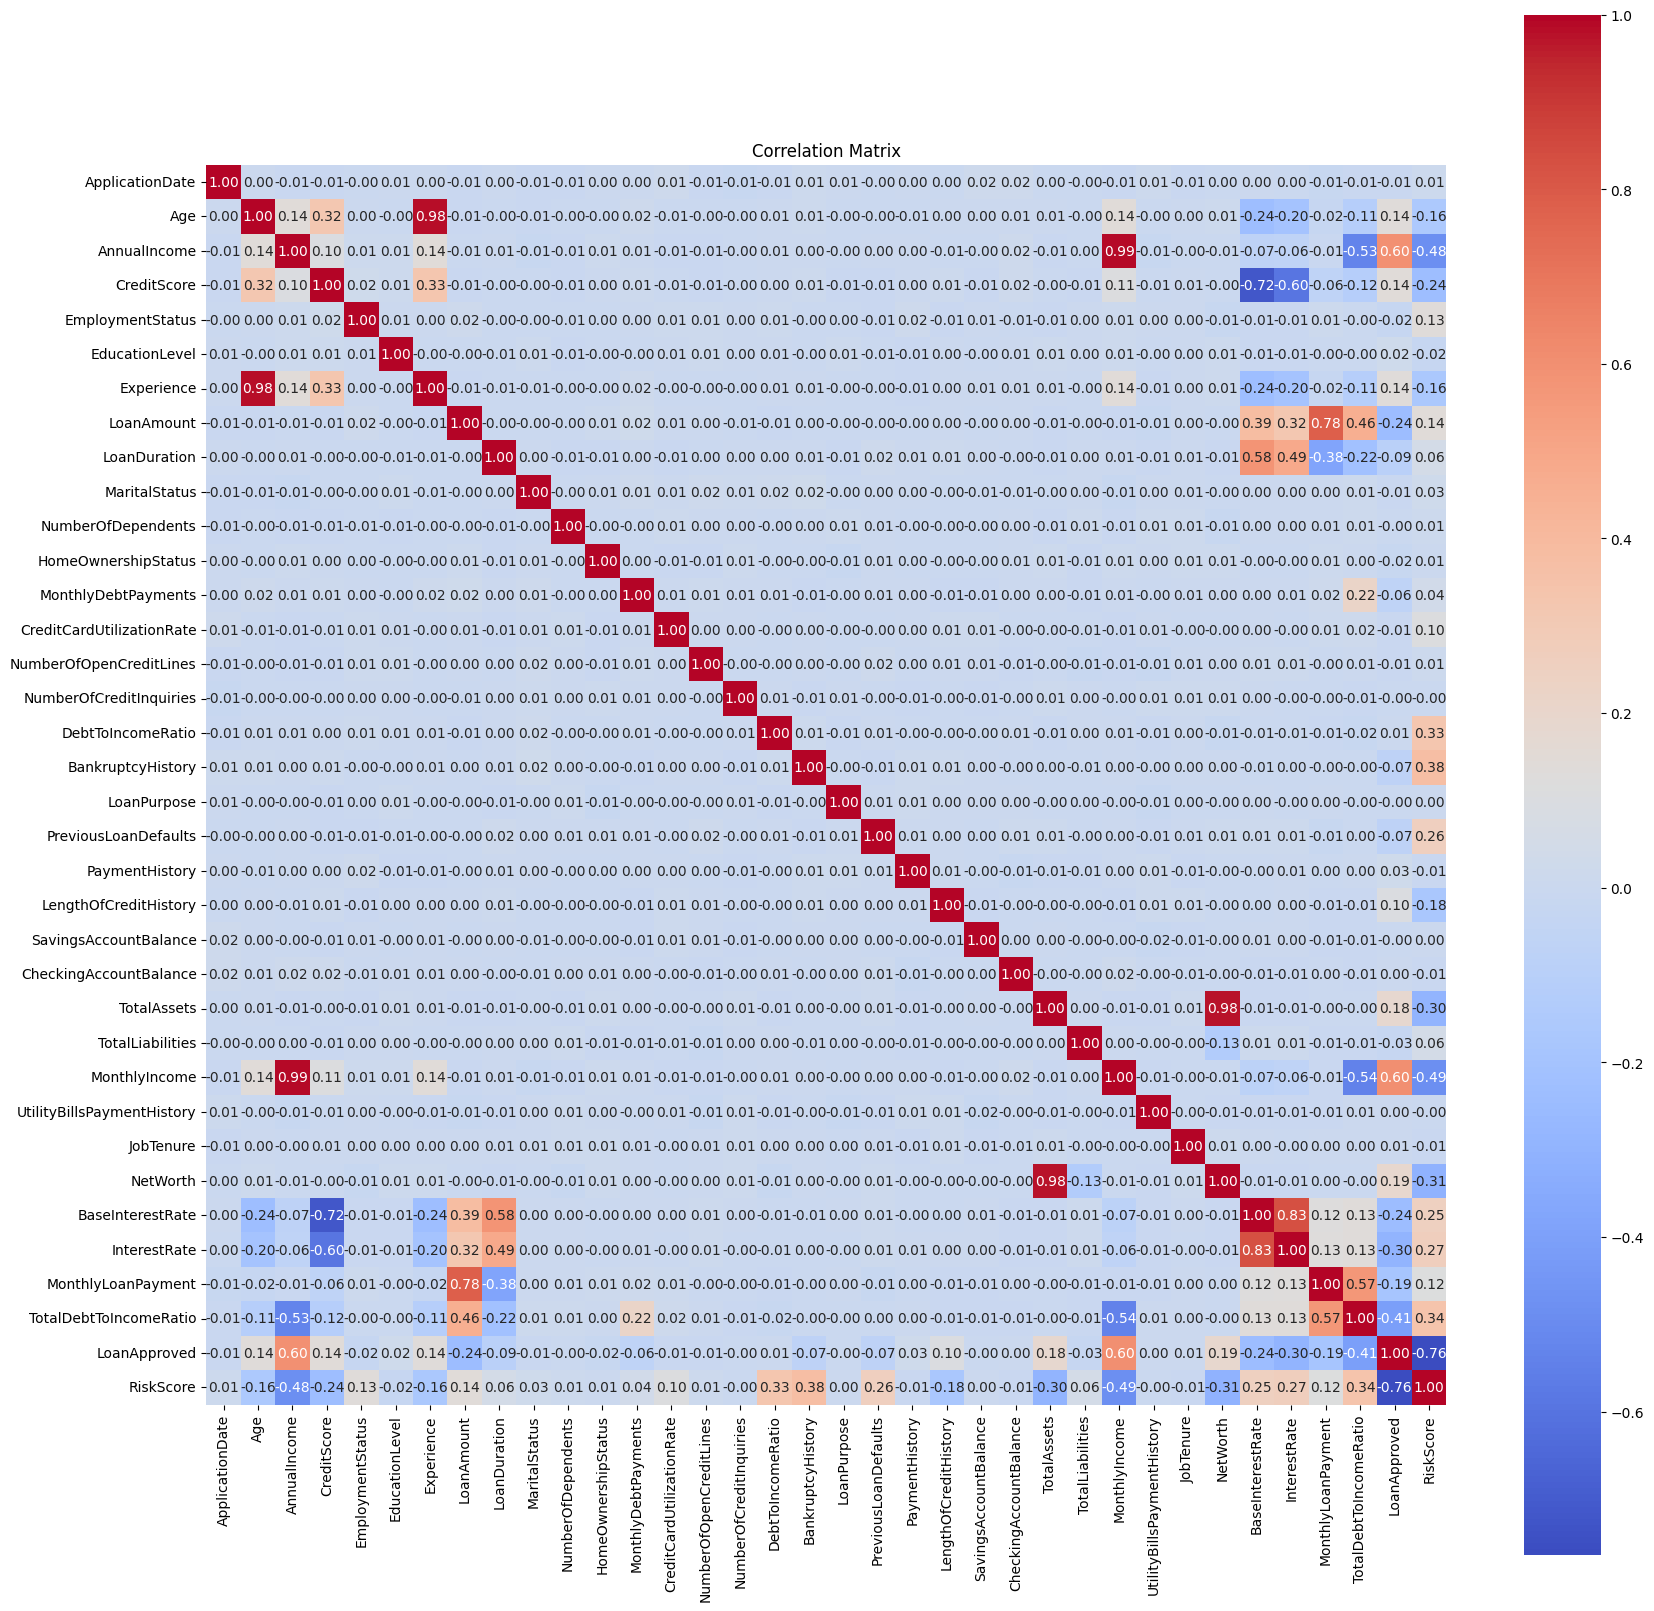

In [20]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [21]:
thershold=0.9

highly_correlated_pairs=[]

for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j]>thershold):
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
print(highly_correlated_pairs)

for pair in highly_correlated_pairs:
  feature_1,feature_2=pair
  interaction_column_name=f"{feature_1}_{feature_2}_interaction"
  train_data[interaction_column_name]=train_data[feature_1]*train_data[feature_2]


[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets')]


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 0 to 15999
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ApplicationDate                         16000 non-null  int64  
 1   Age                                     16000 non-null  int64  
 2   AnnualIncome                            16000 non-null  int64  
 3   CreditScore                             16000 non-null  int64  
 4   EmploymentStatus                        16000 non-null  int64  
 5   EducationLevel                          16000 non-null  int64  
 6   Experience                              16000 non-null  int64  
 7   LoanAmount                              16000 non-null  int64  
 8   LoanDuration                            16000 non-null  int64  
 9   MaritalStatus                           16000 non-null  int64  
 10  NumberOfDependents                      16000 non-null  int64  

In [23]:
test_data['Experience_Age_interaction']=test_data['Experience'] * test_data['Age']
test_data['MonthlyIncome_AnnualIncome_interaction']=test_data['MonthlyIncome'] * test_data['AnnualIncome']
test_data['NetWorth_TotalAssets_interaction'] = test_data['NetWorth'] * test_data['TotalAssets']

In [24]:
train_data=train_data.drop(columns=['Experience','Age','MonthlyIncome','AnnualIncome','NetWorth','TotalAssets'])
test_data=test_data.drop(columns=['Experience','Age','MonthlyIncome','AnnualIncome','NetWorth','TotalAssets'])

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ApplicationDate                         16000 non-null  int64  
 1   CreditScore                             16000 non-null  int64  
 2   EmploymentStatus                        16000 non-null  int64  
 3   EducationLevel                          16000 non-null  int64  
 4   LoanAmount                              16000 non-null  int64  
 5   LoanDuration                            16000 non-null  int64  
 6   MaritalStatus                           16000 non-null  int64  
 7   NumberOfDependents                      16000 non-null  int64  
 8   HomeOwnershipStatus                     16000 non-null  int64  
 9   MonthlyDebtPayments                     16000 non-null  int64  
 10  CreditCardUtilizationRate               16000 non-null  float64

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ApplicationDate                         4000 non-null   int64  
 1   CreditScore                             4000 non-null   int64  
 2   EmploymentStatus                        4000 non-null   int64  
 3   EducationLevel                          4000 non-null   int64  
 4   LoanAmount                              4000 non-null   int64  
 5   LoanDuration                            4000 non-null   int64  
 6   MaritalStatus                           4000 non-null   int64  
 7   NumberOfDependents                      4000 non-null   int64  
 8   HomeOwnershipStatus                     4000 non-null   int64  
 9   MonthlyDebtPayments                     4000 non-null   int64  
 10  CreditCardUtilizationRate               4000 non-null   float64
 

In [27]:
X= train_data.drop(columns=["RiskScore"],axis=1)
y= train_data["RiskScore"]

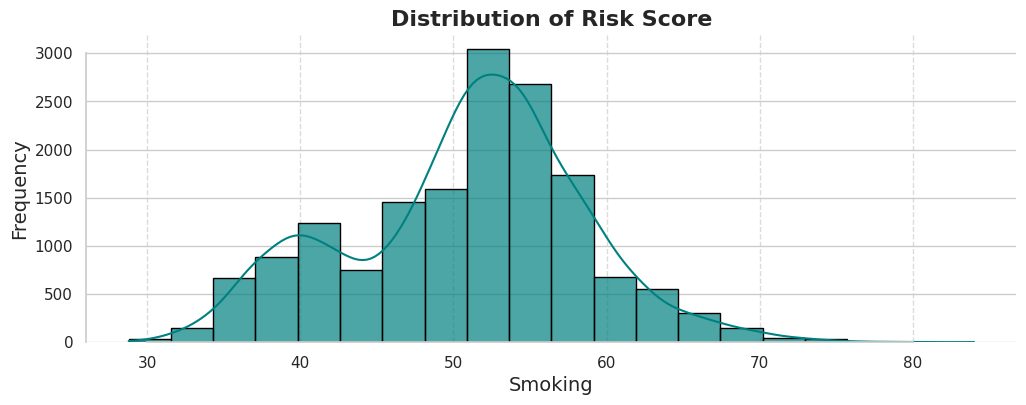

Skewness :-0.173506
Kurtosis :-0.141495


In [28]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

f,ax=plt.subplots(figsize=(12,4))

sns.histplot(y,kde=True,color='teal',bins=20,alpha=0.7,edgecolor='black')

ax.set_title('Distribution of Risk Score',fontsize=16,weight='bold')
ax.set_xlabel('Smoking',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

ax.xaxis.grid(True, linestyle='--',alpha=0.7)
sns.despine(trim=True)

plt.show()
print("Skewness :%f"%y.skew())
print("Kurtosis :%f"%y.kurt())

In [29]:
x_train=X.drop(columns=['ApplicationDate'])
y_train=y

In [30]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [31]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [32]:
x_test=test_data.drop(columns=['RiskScore','ApplicationDate'])
y_test=test_data['RiskScore']

In [33]:
x_test

CreditScore  EmploymentStatus  EducationLevel  LoanAmount  LoanDuration  \
0             604                 0               3       28479            84   
1             509                 0               3       11222            60   
2             483                 0               3       31573            48   
3             412                 0               4       21937            12   
4             551                 0               4       31510            48   
...           ...               ...             ...         ...           ...   
3995          538                 1               3       15867            60   
3996          615                 0               0       17570            48   
3997          537                 0               0       34370            24   
3998          600                 1               3       27070            48   
3999          481                 0               1       37211            60   

      MaritalStatus  NumberOfDependents  HomeOwnershipStatus  \
0                 2                   0                    0   
1                 1                   2                    0   
2                 3                   0                    2   
3                 1                   3                    3   
4                 0                   0                    3   
...             ...                 ...                  ...   
3995              1                   3                    0   
3996              1                   4                    2   
3997              2                   1                    0   
3998              1                   1                    3   
3999              0                   0                    3   

      MonthlyDebtPayments  CreditCardUtilizationRate  ...  \
0                      88                   0.280949  ...   
1                     411                   0.289522  ...   
2                     442                   0.513947  ...   
3                     409                   0.256789  ...   
4                     533                   0.216696  ...   
...                   ...                        ...  ...   
3995                 1309                   0.191287  ...   
3996                  514                   0.117599  ...   
3997                  454                   0.132255  ...   
3998                  932                   0.211452  ...   
3999                  929                   0.318471  ...   

      UtilityBillsPaymentHistory  JobTenure  BaseInterestRate  InterestRate  \
0                       0.809983          7          0.251479      0.222397   
1                       0.831507          7          0.261722      0.270451   
2                       0.800830          1          0.285073      0.342088   
3                       0.954407          5          0.280937      0.280613   
4                       0.840267          3          0.251010      0.250815   
...                          ...        ...               ...           ...   
3995                    0.839494          1          0.251867      0.224049   
3996                    0.939972          4          0.205070      0.199855   
3997                    0.870703          5          0.240870      0.261736   
3998                    0.950359         10          0.222070      0.261538   
3999                    0.681281          5          0.301711      0.307611   

      MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  \
0             671.369324                0.090436             1   
1             342.970300                0.047832             1   
2            1215.387601                0.271436             0   
3            2117.710361                0.530868             0   
4            1046.213156                0.309877             0   
...                  ...                     ...           ...   
3995          441.889887                0.334081             1   
3996          534.526117                0.331585      

In [34]:
reg1 = GradientBoostingRegressor(n_estimators=10)
reg2 = LGBMRegressor(n_estimators=10)
reg3 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg4 = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=10)
reg5 = XGBRegressor(n_estimators=10, max_depth=6, eval_metric='logloss')  # 使用適合分類的評估指標
reg6 = RandomForestRegressor(n_estimators=10)
reg7 = ExtraTreesRegressor(n_estimators=10)
reg8 = DecisionTreeRegressor()
reg9 = CatBoostRegressor(logging_level='Silent', n_estimators=10)

In [35]:
reg1.fit(x_train,y_train)
reg2.fit(x_train,y_train)
reg3.fit(x_train,y_train)
reg4.fit(x_train,y_train)
reg5.fit(x_train,y_train)
reg6.fit(x_train,y_train)
reg7.fit(x_train,y_train)
reg8.fit(x_train,y_train)
reg9.fit(x_train,y_train)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4220
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 31
[LightGBM] [Info] Start training from score 50.843600


In [36]:
pred1=reg1.predict(x_test)
pred2=reg2.predict(x_test)
pred3=reg3.predict(x_test)
pred4=reg4.predict(x_test)
pred5=reg5.predict(x_test)
pred6=reg6.predict(x_test)
pred7=reg7.predict(x_test)
pred8=reg8.predict(x_test)
pred9=reg9.predict(x_test)



rmse1=np.sqrt(mean_squared_error(y_test,pred1))
rmse2=np.sqrt(mean_squared_error(y_test,pred2))
rmse3=np.sqrt(mean_squared_error(y_test,pred3))
rmse4=np.sqrt(mean_squared_error(y_test,pred4))
rmse5=np.sqrt(mean_squared_error(y_test,pred5))
rmse6=np.sqrt(mean_squared_error(y_test,pred6))
rmse7=np.sqrt(mean_squared_error(y_test,pred7))
rmse8=np.sqrt(mean_squared_error(y_test,pred8))
rmse9=np.sqrt(mean_squared_error(y_test,pred9))

r2_1=r2_score(y_test,pred1)
r2_2=r2_score(y_test,pred2)
r2_3=r2_score(y_test,pred3)
r2_4=r2_score(y_test,pred4)
r2_5=r2_score(y_test,pred5)
r2_6=r2_score(y_test,pred6)
r2_7=r2_score(y_test,pred7)
r2_8=r2_score(y_test,pred8)
r2_9=r2_score(y_test,pred9)

In [37]:
rmse_value=[]
r2_values=[]
regressor_name=[]

regressor=[reg1,reg2,reg3,reg4,reg5,reg6,reg7,reg8,reg9]

for reg in regressor:
  reg_name=reg.__class__.__name__
  y_pred=reg.predict(x_test)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  r2=r2_score(y_test,y_pred)

  rmse_value.append(rmse)
  r2_values.append(r2)
  regressor_name.append(reg_name)


rmse_sorted_value=np.argsort(rmse_value)
rmse_value_sorted=np.array(rmse_value)[rmse_sorted_value]
regressor_names_rmse_sorted=np.array(regressor_name)[rmse_sorted_value]


r2_sorted_value=np.argsort(r2_values)[::-1]
r2_values_sorted=np.array(r2_values)[r2_sorted_value]
regressor_names_r2_sorted=np.array(regressor_name)[r2_sorted_value]

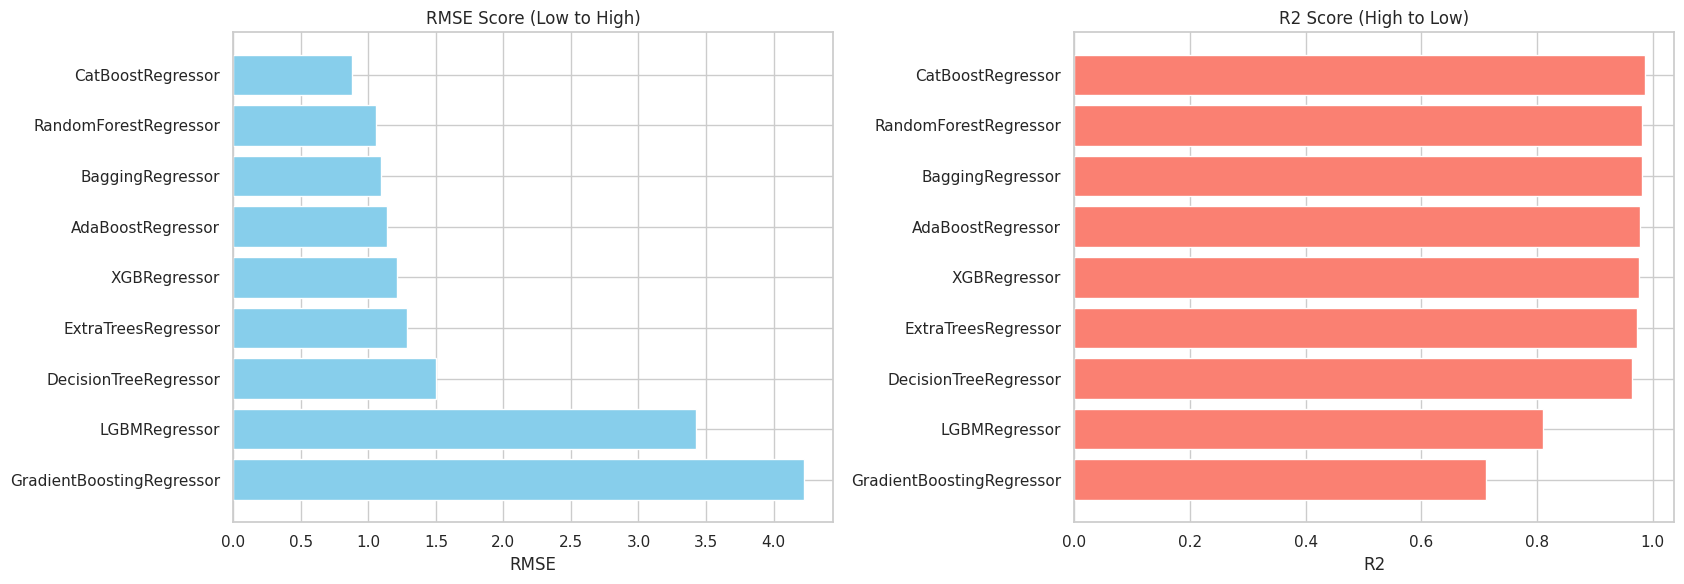

In [38]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

ax[0].barh(regressor_names_rmse_sorted,rmse_value_sorted,color='skyblue')
ax[0].set_title('RMSE Score (Low to High)')
ax[0].set_xlabel('RMSE')
ax[0].invert_yaxis()

ax[1].barh(regressor_names_r2_sorted,r2_values_sorted,color='salmon')
ax[1].set_title('R2 Score (High to Low)')
ax[1].set_xlabel('R2')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [39]:
##****************************  FOR CLASSIFICATION ALGORITHM ***************************************####

In [50]:
train=pd.read_csv('/content/Loan.csv')

In [51]:
train,test=train_test_split(train,test_size=0.2,random_state=42)

In [52]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
train_target=train['LoanApproved']
test_target=test['LoanApproved']
train_data=train.drop(columns=['LoanApproved'])
test_data=test.drop(columns=['LoanApproved'])


combined=pd.concat([train_data,test_data],axis=0)

le=LabelEncoder()

for i in combined.columns:
  if combined[i].dtypes =='object':
    combined[i]=le.fit_transform(combined[i])


train_data_transformed=combined.iloc[:len(train_data),:]
test_data_transformed=combined.iloc[len(train_data):,:]


train_transformed=pd.concat([train_data_transformed,train_target],axis=1)
test_transformed=pd.concat([test_data_transformed,test_target],axis=1)


train=train_transformed.copy()
test=test_transformed.copy()


train=train.drop(columns=['ApplicationDate'])
test=test.drop(columns=['ApplicationDate'])

display(train)
display(test)


Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0       45         15000          620                 0               0   
1       25         49855          486                 0               4   
2       51         38932          576                 0               4   
3       18         58116          516                 2               3   
4       25         62939          562                 0               1   
...    ...           ...          ...               ...             ...   
15995   32         37134          569                 0               3   
15996   30         15000          618                 0               1   
15997   31         48088          517                 0               4   
15998   42         15265          606                 0               1   
15999   37         45197          631                 0               1   

       Experience  LoanAmount  LoanDuration  MaritalStatus  \
0              21       17419            36              1   
1               3       18998            48              1   
2              30       17844            72              1   
3               0       24050            60              1   
4               3       27263            36              1   
...           ...         ...           ...            ...   
15995          10       31048            48              1   
15996           6       17491            48              3   
15997           4       11381           120              1   
15998          20       10643            60              1   
15999          15       52646            36              0   

       NumberOfDependents  ...  MonthlyIncome  UtilityBillsPaymentHistory  \
0                       3  ...    1250.000000                    0.832612   
1                       5  ...    4154.583333                    0.510667   
2                       1  ...    3244.333333                    0.835804   
3                       0  ...    4843.000000                    0.851177   
4                       0  ...    5244.916667                    0.587644   
...                   ...  ...            ...                         ...   
15995                   3  ...    3094.500000                    0.715250   
15996                   1  ...    1250.000000                    0.590477   
15997                   0  ...    4007.333333                    0.696813   
15998                   1  ...    1272.083333                    0.882421   
15999                   1  ...    3766.416667                    0.883861   

       JobTenure  NetWorth  BaseInterestRate  InterestRate  \
0              7     59717          0.192419      0.199351   
1              4      4711          0.270998      0.277787   
2              4      2228          0.244844      0.250450   
3              4     52964          0.271050      0.254826   
4              3    189178          0.231263      0.185010   
...          ...       ...               ...           ...   
15995          6    525387          0.241548      0.217129   
15996          3      7558          0.203491      0.233639   
15997          5    654095          0.307881      0.320535   
15998          1     35612          0.212643      0.205157   
15999          5     26458          0.222146      0.257427   

       MonthlyLoanPayment  TotalDebtToIncomeRatio  RiskScore  LoanApproved  
0              646.777017                0.932622       49.0             0  
1              659.717604                0.256035       61.0             0  
2              481.159537                0.299648       52.0             0  
3              712.720107                0.318753       54.0             0  
4              992.488743                0.335275       58.0             0  
...                   ...                     ...        ...           ...  
15995          973.367177                0.496160       43.0             0  
15996          564.104989                0.927284       62.0             0 

Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0      37        100761          604                 0               3   
1      35        189154          509                 0               3   
2      44         73272          483                 0               3   
3      41         57115          412                 0               4   
4      39         61155          551                 0               4   
...   ...           ...          ...               ...             ...   
3995   38         62891          538                 1               3   
3996   41         37946          615                 0               0   
3997   47         15000          537                 0               0   
3998   26         38443          600                 1               3   
3999   45         59283          481                 0               1   

      Experience  LoanAmount  LoanDuration  MaritalStatus  NumberOfDependents  \
0             16       28479            84              2                   0   
1             11       11222            60              1                   2   
2             20       31573            48              3                   0   
3             20       21937            12              1                   3   
4             19       31510            48              0                   0   
...          ...         ...           ...            ...                 ...   
3995          18       15867            60              1                   3   
3996          17       17570            48              1                   4   
3997          25       34370            24              2                   1   
3998           3       27070            48              1                   1   
3999          27       37211            60              0                   0   

      ...  MonthlyIncome  UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0     ...    8396.750000                    0.809983          7      7304   
1     ...   15762.833333                    0.831507          7     22443   
2     ...    6106.000000                    0.800830          1     20044   
3     ...    4759.583333                    0.954407          5      1714   
4     ...    5096.250000                    0.840267          3     55941   
...   ...            ...                         ...        ...       ...   
3995  ...    5240.916667                    0.839494          1    273416   
3996  ...    3162.166667                    0.939972          4     90558   
3997  ...    1250.000000                    0.870703          5     23169   
3998  ...    3203.583333                    0.950359         10     18567   
3999  ...    4940.250000                    0.681281          5      2437   

      BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0             0.251479      0.222397          671.369324   
1             0.261722      0.270451          342.970300   
2             0.285073      0.342088         1215.387601   
3             0.280937      0.280613         2117.710361   
4             0.251010      0.250815         1046.213156   
...                ...           ...                 ...   
3995          0.251867      0.224049          441.889887   
3996          0.205070      0.199855          534.526117   
3997          0.240870      0.261736         1854.679311   
3998          0.222070      0.261538          915.071479   
3999          0.301711      0.307611         1221.355467   

      TotalDebtToIncomeRatio  RiskScore  LoanApproved  
0                   0.090436       41.6             1  
1                   0.047832       38.4             1  
2                   0.271436       53.0             0  
3                   0.530868       50.0             0  
4                   0.309877       51.0             0  
...                      ...        ...           ...  
3995                0.334081       41.6             1  
3996                0.331585       45.0           

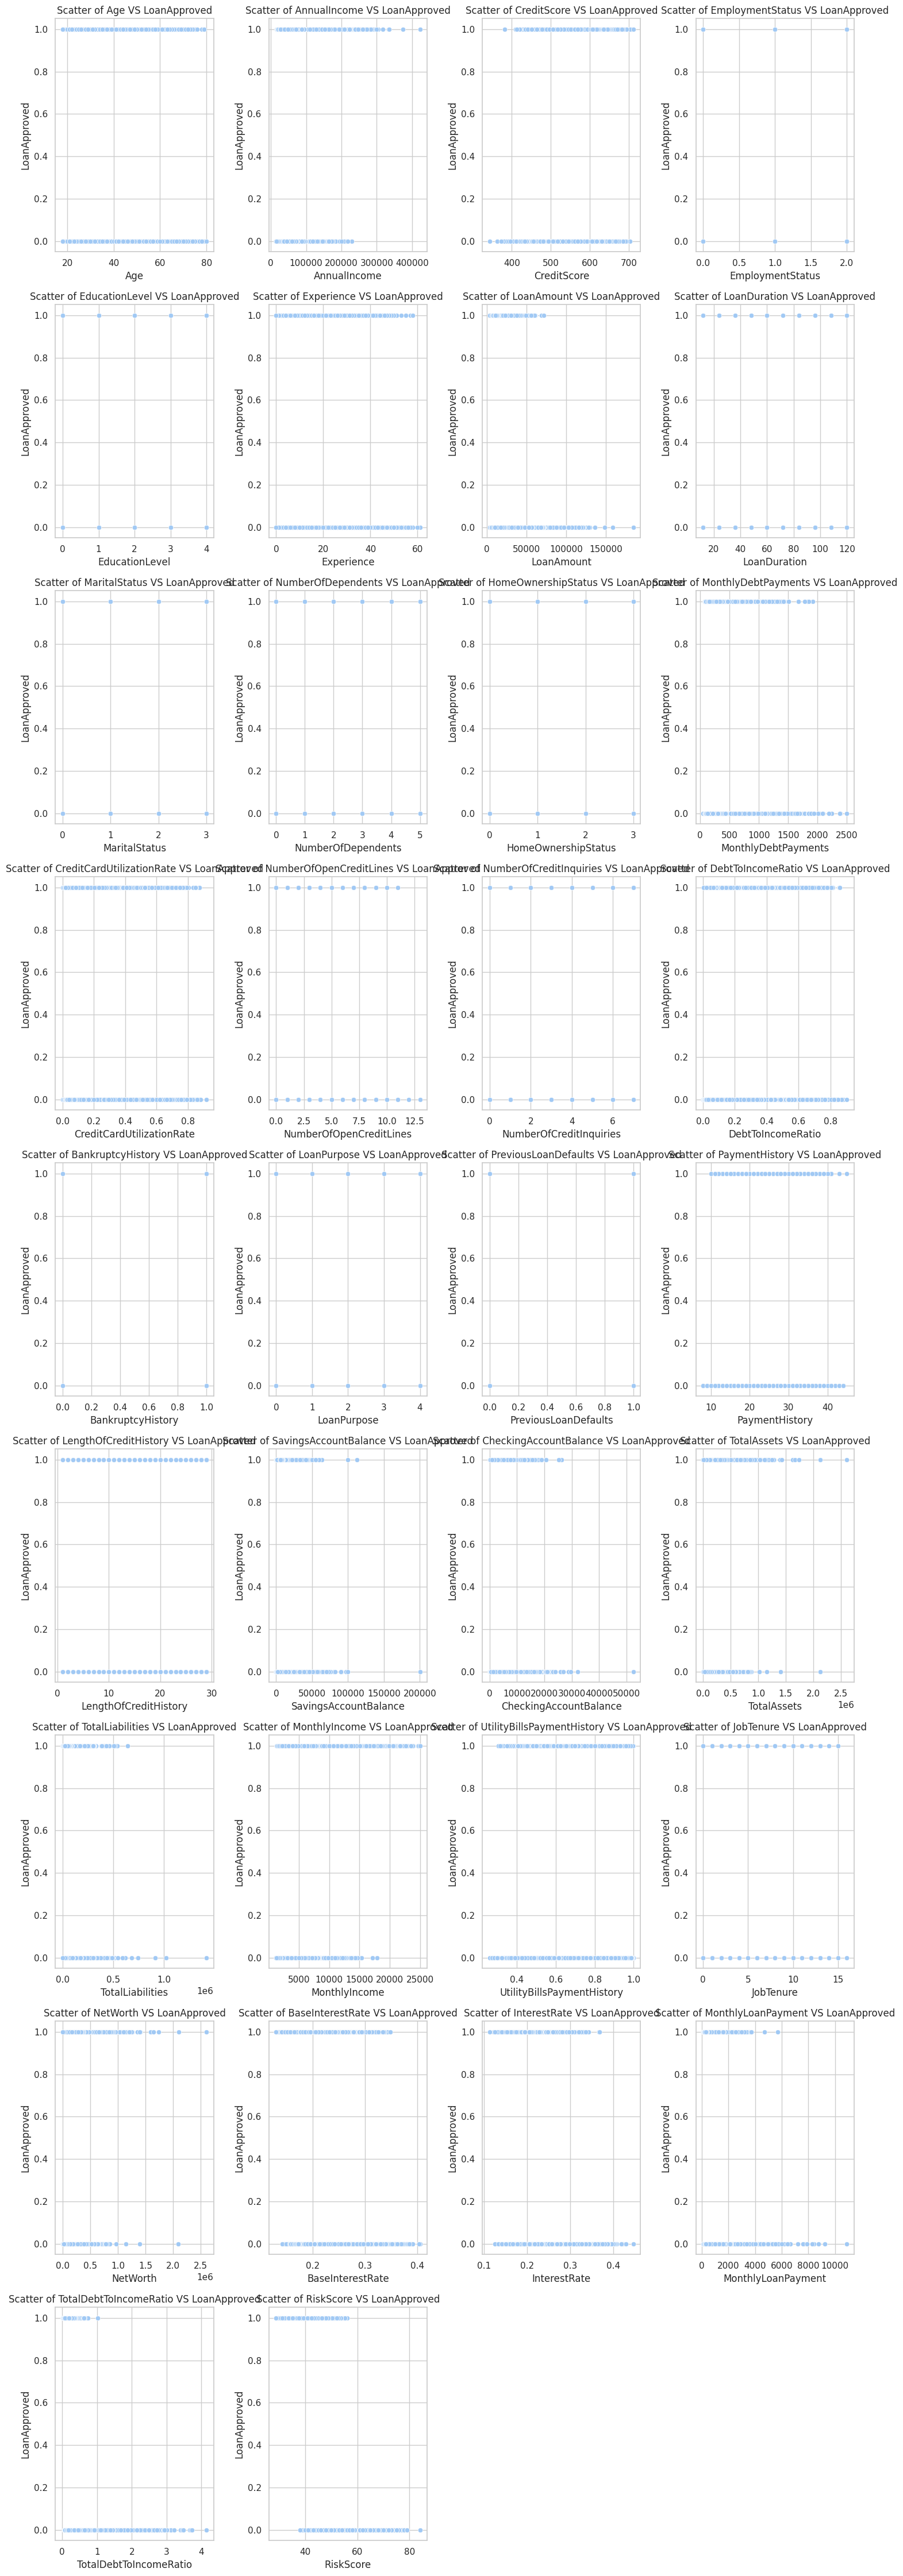

In [55]:
target_variable='LoanApproved'
features=train.columns.drop(target_variable)

n_features=len(features)
n_cols=4
n_rows=(n_features+n_cols-1)//n_cols

plt.figure(figsize=(15,n_rows * 5))

for i,feature in enumerate(features):
  plt.subplot(n_rows,n_cols,i+1)
  sns.scatterplot(x=train[feature],y=train[target_variable])
  plt.title(f"Scatter of {feature} VS {target_variable}")
  plt.xlabel(feature)
  plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

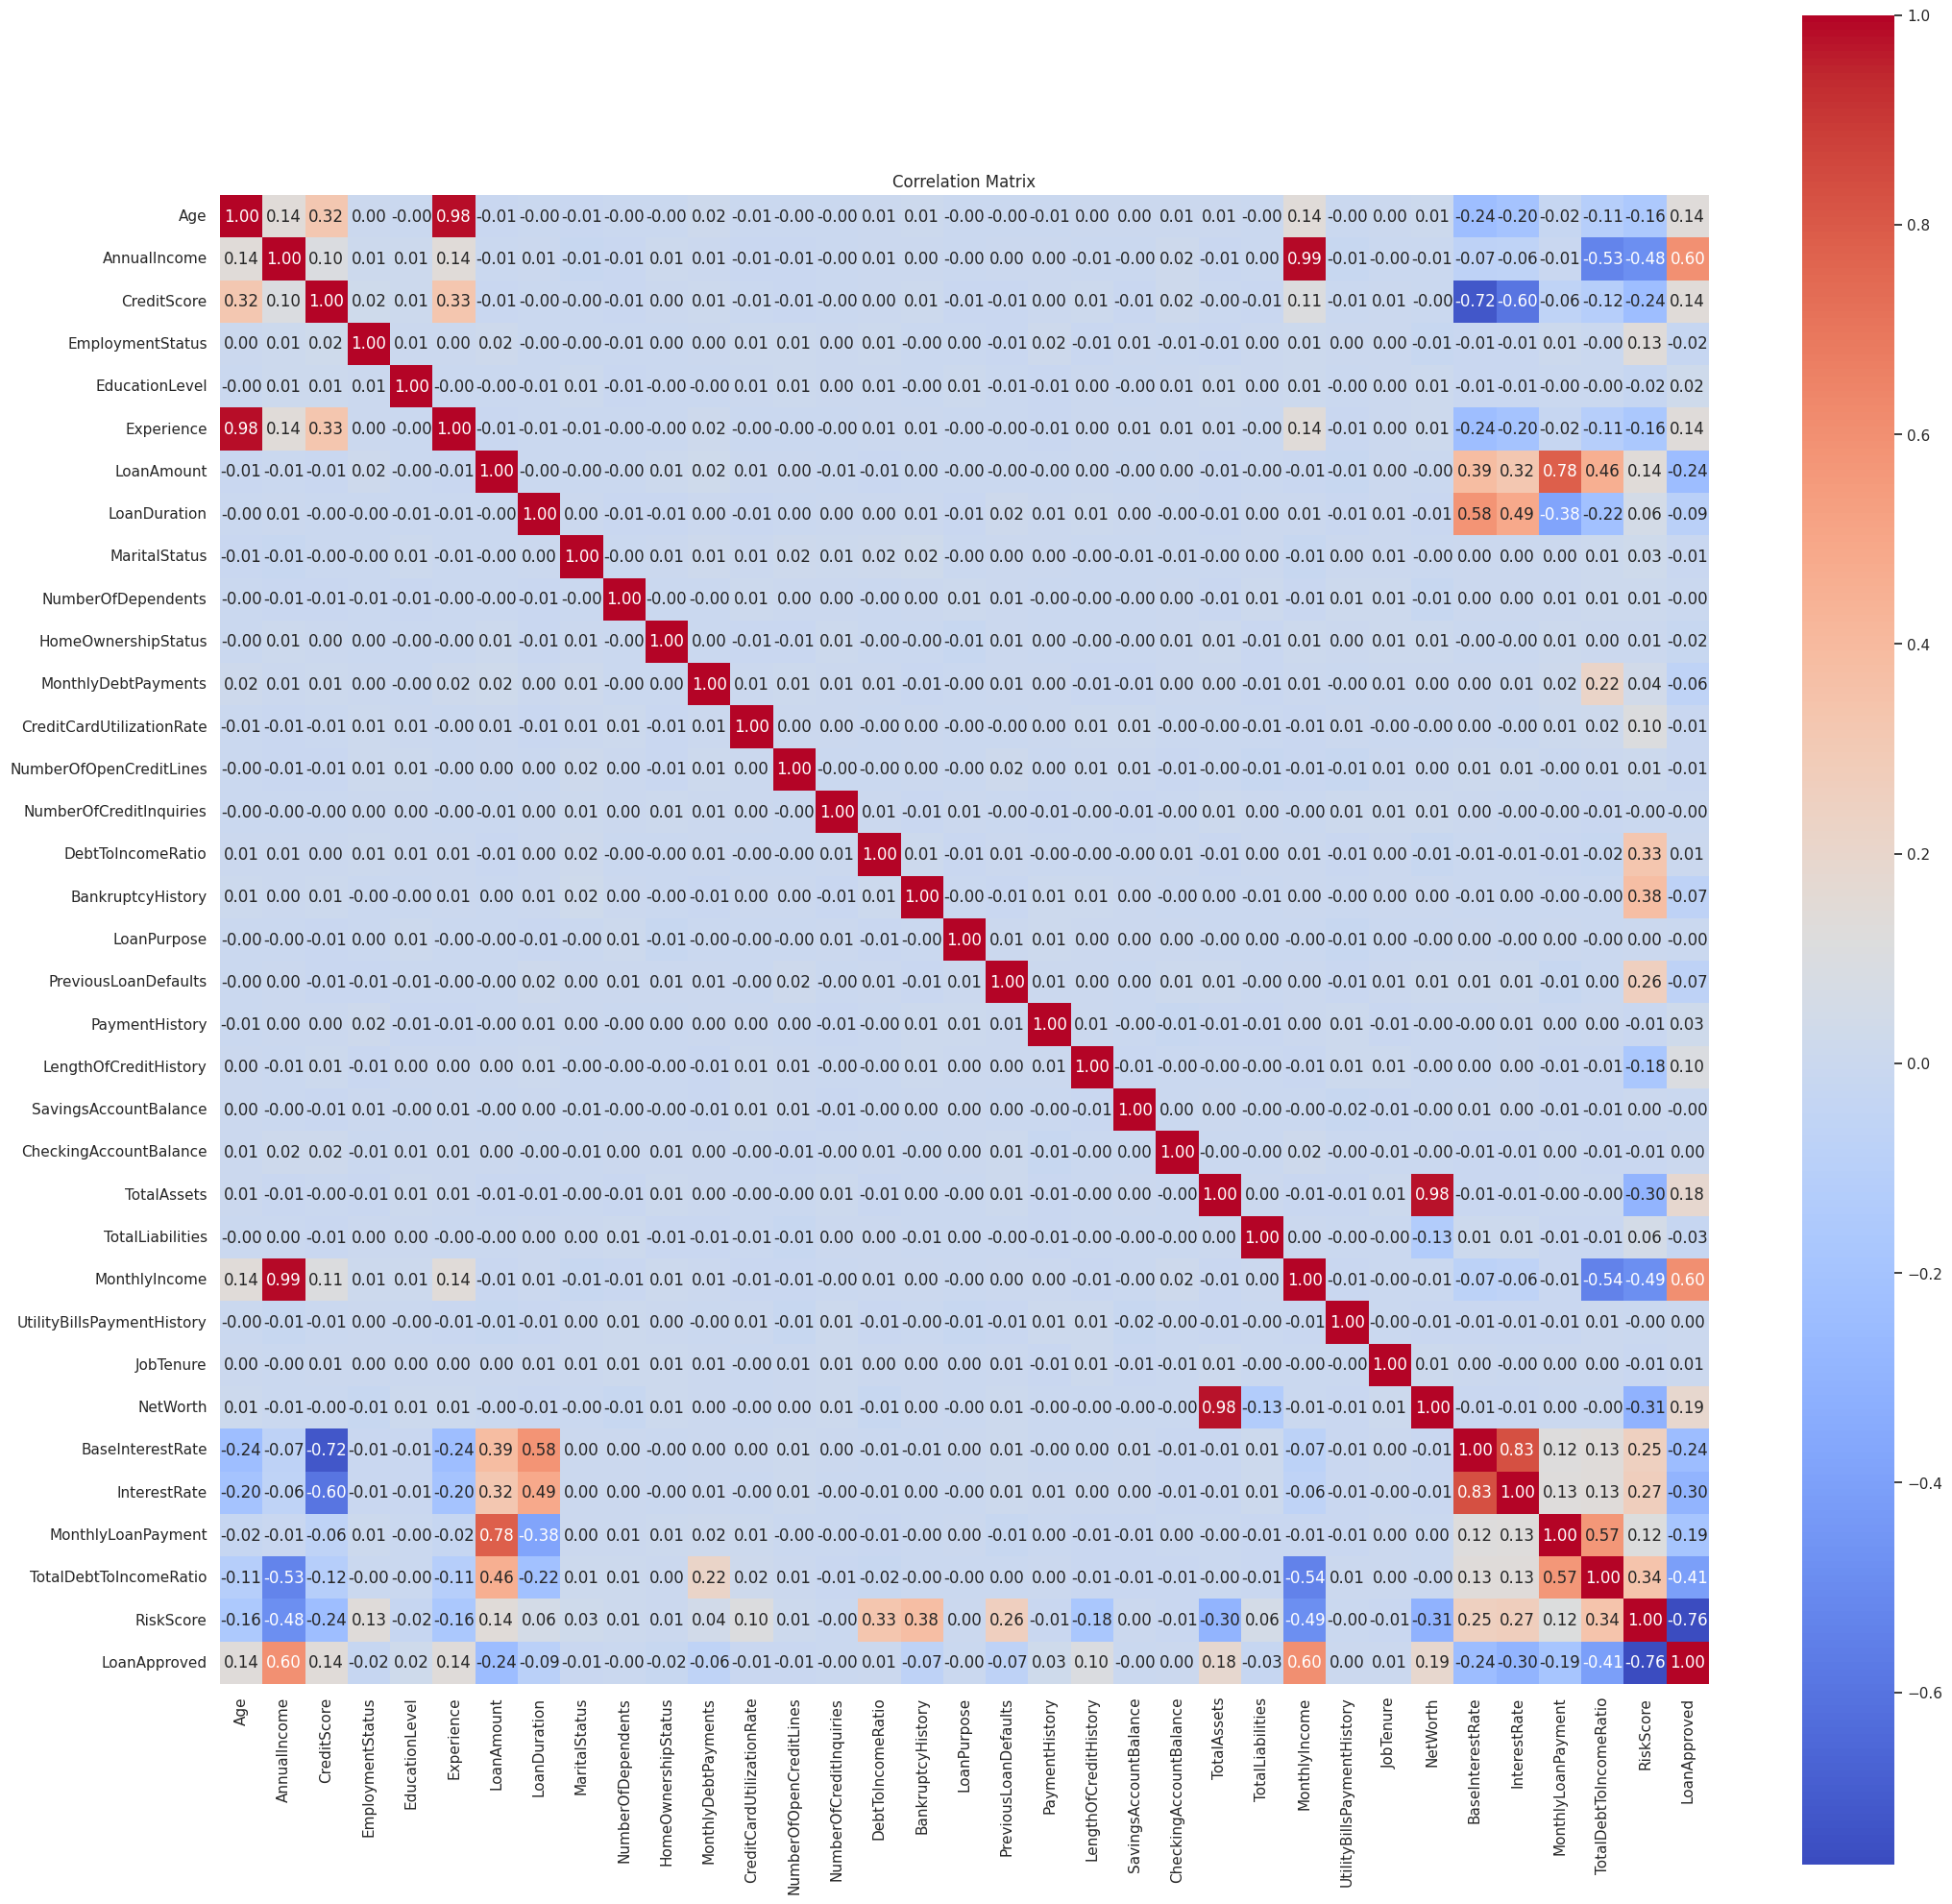

In [62]:
correlation_matrix=train.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',cbar=True,fmt='.2f',square=True)
plt.title("Correlation Matrix")
plt.show()

In [68]:
thershold=0.9

higher_correlated_pairs=[]

for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>thershold:
      higher_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))

print(higher_correlated_pairs)


for pair in higher_correlated_pairs:
  feature_1,feature_2=pair
  interaction_column_name=f"{feature_1}_{feature_2}_interaction"
  train[interaction_column_name]=train[feature_1] * train[feature_2]

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets')]


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 0 to 15999
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     16000 non-null  int64  
 1   AnnualIncome                            16000 non-null  int64  
 2   CreditScore                             16000 non-null  int64  
 3   EmploymentStatus                        16000 non-null  int64  
 4   EducationLevel                          16000 non-null  int64  
 5   Experience                              16000 non-null  int64  
 6   LoanAmount                              16000 non-null  int64  
 7   LoanDuration                            16000 non-null  int64  
 8   MaritalStatus                           16000 non-null  int64  
 9   NumberOfDependents                      16000 non-null  int64  
 10  HomeOwnershipStatus                     16000 non-null  int64  

In [70]:
test['Experience_Age_interaction']=test['Experience'] * test['Age']
test['MonthlyIncome_AnnualIncome_interaction']=test['MonthlyIncome'] * test['AnnualIncome']
test['NetWorth_TotalAssets_interaction'] = test['NetWorth'] * test['TotalAssets']

In [71]:
train=train.drop(columns=['Experience','Age','MonthlyIncome','AnnualIncome','NetWorth','TotalAssets'])
test=test.drop(columns=['Experience','Age','MonthlyIncome','AnnualIncome','NetWorth','TotalAssets'])

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 0 to 15999
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CreditScore                             16000 non-null  int64  
 1   EmploymentStatus                        16000 non-null  int64  
 2   EducationLevel                          16000 non-null  int64  
 3   LoanAmount                              16000 non-null  int64  
 4   LoanDuration                            16000 non-null  int64  
 5   MaritalStatus                           16000 non-null  int64  
 6   NumberOfDependents                      16000 non-null  int64  
 7   HomeOwnershipStatus                     16000 non-null  int64  
 8   MonthlyDebtPayments                     16000 non-null  int64  
 9   CreditCardUtilizationRate               16000 non-null  float64
 10  NumberOfOpenCreditLines                 16000 non-null  int64  

In [73]:
x=train.drop(columns=['LoanApproved'])
y=train['LoanApproved']

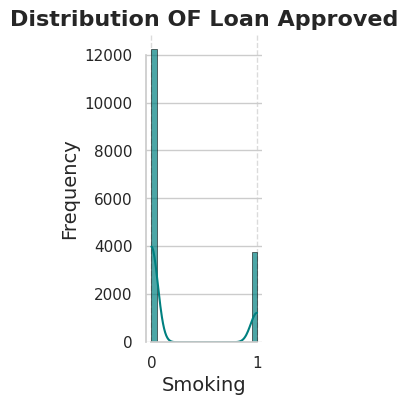

In [74]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

f,ax=plt.subplots(figsize=(1.5,4))

sns.histplot(y,kde=True,color='teal',bins=20,alpha=0.7,edgecolor='black')
ax.set_title('Distribution OF Loan Approved',fontsize=16,weight='bold')
ax.set_xlabel('Smoking',fontsize=14)
ax.set_ylabel('Frequency',fontsize=14)

ax.xaxis.grid(True, linestyle='--',alpha=0.7)
sns.despine(trim=True)


In [75]:
x_train=x
y_train=y

In [78]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [77]:
x_test=test.drop(columns=['LoanApproved'])
y_test=test['LoanApproved']


In [79]:
cls1 = GradientBoostingClassifier(n_estimators=10)
cls2 = LGBMClassifier(n_estimators=10)
cls3 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
cls4 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
cls5 = XGBClassifier(n_estimators=10, max_depth=6, eval_metric='logloss')  # 使用適合分類的評估指標
cls6 = RandomForestClassifier(n_estimators=10)
cls7 = ExtraTreesClassifier(n_estimators=10)
cls8 = DecisionTreeClassifier()
cls9 = CatBoostClassifier(logging_level='Silent', n_estimators=10)

In [80]:
cls1.fit(x_train,y_train)
cls2.fit(x_train,y_train)
cls3.fit(x_train,y_train)
cls4.fit(x_train,y_train)
cls5.fit(x_train,y_train)
cls6.fit(x_train,y_train)
cls7.fit(x_train,y_train)
cls8.fit(x_train,y_train)
cls9.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4287
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [81]:
pred1=cls1.predict(x_test)
pred2=cls2.predict(x_test)
pred3=cls3.predict(x_test)
pred4=cls4.predict(x_test)
pred5=cls5.predict(x_test)
pred6=cls6.predict(x_test)
pred7=cls7.predict(x_test)
pred8=cls8.predict(x_test)
pred9=cls9.predict(x_test)

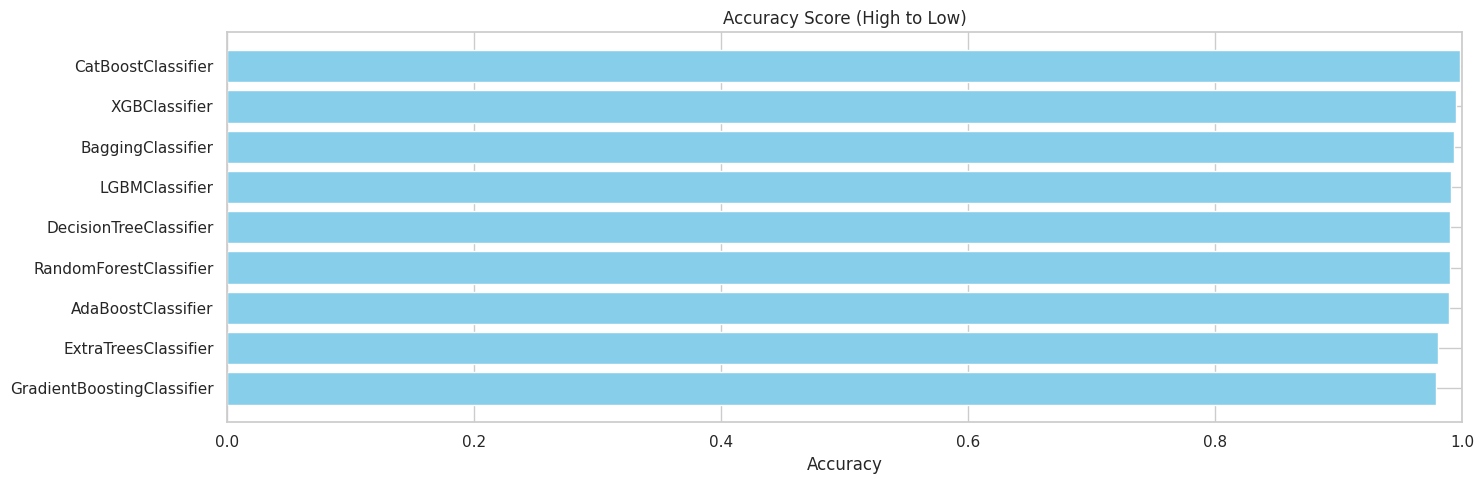

In [84]:
acc_val=[
    accuracy_score(y_test,pred1),
    accuracy_score(y_test,pred2),
    accuracy_score(y_test,pred3),
    accuracy_score(y_test,pred4),
    accuracy_score(y_test,pred5),
    accuracy_score(y_test,pred6),
    accuracy_score(y_test,pred7),
    accuracy_score(y_test,pred8),
    accuracy_score(y_test,pred9)
]

classifier_name=[
    cls1.__class__.__name__,
    cls2.__class__.__name__,
    cls3.__class__.__name__,
    cls4.__class__.__name__,
    cls5.__class__.__name__,
    cls6.__class__.__name__,
    cls7.__class__.__name__,
    cls8.__class__.__name__,
    cls9.__class__.__name__
]


acc_sorted_value=np.argsort(acc_val)[::-1]
acc_values_sorted=np.array(acc_val)[acc_sorted_value]
classifier_name_sorted=np.array(classifier_name)[acc_sorted_value]


plt.figure(figsize=(15,5))

plt.barh(classifier_name_sorted,acc_values_sorted,color='skyblue')
plt.title('Accuracy Score (High to Low)')
plt.xlabel("Accuracy")
plt.gca().invert_yaxis()
plt.xlim(0,1)
plt.tight_layout()
plt.show()


Accuracy : 0.9985 
Precision : 0.9980 
Recall : 0.9961 
F1 Score : 0.9970 


<ipython-input-86-0a3cdfe1f4ae>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score',y='Metrics',data=metrics,palette='viridis')


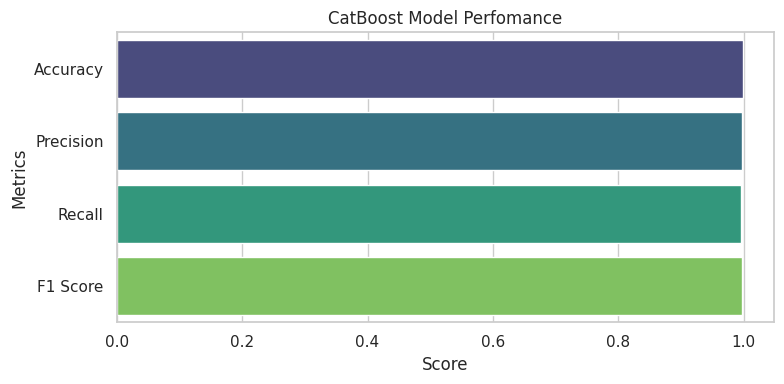

In [86]:
y_true=y_test
y_pred=pred9

accuracy=accuracy_score(y_true,y_pred)
precision=precision_score(y_true,y_pred)
recall=recall_score(y_true,y_pred)
f1=f1_score(y_true,y_pred)

metrics=pd.DataFrame({
    'Metrics':['Accuracy','Precision','Recall','F1 Score'],
    'Score':[accuracy,precision,recall,f1]


})

for index,row in metrics.iterrows():
  print(f"{row['Metrics']} : {row['Score']:.4f} ")


plt.figure(figsize=(8,4))
sns.barplot(x='Score',y='Metrics',data=metrics,palette='viridis')
plt.title('CatBoost Model Perfomance')
plt.xlabel("Score")
plt.ylabel("Metrics")
plt.tight_layout()
plt.show()





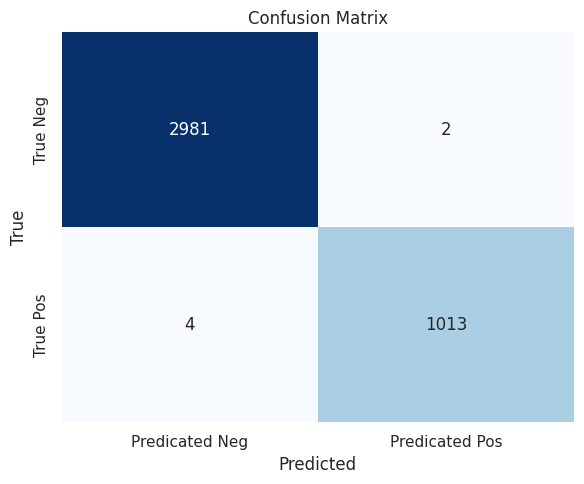

In [89]:
from sklearn.metrics import pair_confusion_matrix

cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues',cbar=False, xticklabels=['Predicated Neg','Predicated Pos'], yticklabels=['True Neg','True Pos'] )
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

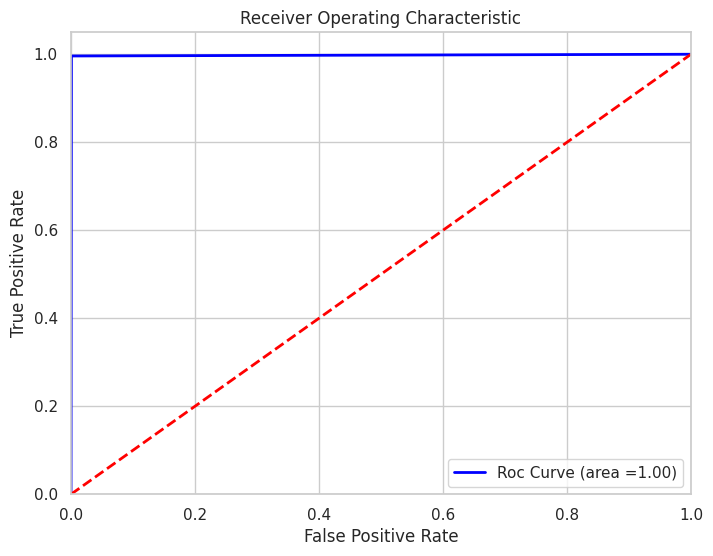

In [90]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,_ =roc_curve(y_true,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2,label='Roc Curve (area ={:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()